# Gambler's Problem

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler’s capital, $s \in {1, 2, . . . , 99}$ and the actions are stakes, $a \in {0, 1, . . . , min(s, 100−s)}$.

The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

Let $p_h$ denote the probability of getting heads. We shall implement value iteration for the gambler’s problem and solve it for $p_ h= 0.25$ and $p_h = 0.55$

We will iteratively update $V(s)$ using the Bellman equation: $$V(s) = \max_a \left[ p_h \cdot V(s+a) + (1 - p_h) \cdot V(s-a) \right]$$ Then update the policy after convergence by choosing the action $a$ that maximizes $V(s)$

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def value_iteration(prob_head, epsilon=1e-6):
    value=np.zeros(101)
    policy=np.zeros(101,dtype=int)
    reward=np.zeros(101)
    reward[100]=1
    states=np.arange(1,100)
    #term_states=[0,100]
    #iter=0
    while True: 
        delta=0
        for state in states:
            best_avalue=0
            best_action=0

            for action in range(1,min(state,100-state)+1): 
                win=int(state+action)
                loss=int(state-action)
                a_val=(prob_head*(value[win]+reward[win])+(1-prob_head)*(value[loss]+reward[loss]))
                if(a_val>best_avalue):
                    best_avalue=a_val
                    best_action=action
            
            delta=max(delta, abs(value[state]-best_avalue))
            value[state]= best_avalue
            policy[state]=best_action

        if delta<epsilon:
            break
    return value,policy

In [43]:
def plot_results(value,policy,prob_head):
    plt.figure(figsize=(14, 6))

    # Plot value function
    plt.subplot(1, 2, 1)
    plt.plot(range(101),value,marker='o',color='green')
    plt.title(f'Value Function ($p_h = {prob_head}$)')
    plt.xlabel('Capital')
    plt.ylabel('Value Estimates')

    # Plot policy
    plt.subplot(1, 2, 2)
    plt.bar(range(101), policy, width=0.9, color='skyblue', edgecolor='black')
    plt.title(f'Policy ($p_h = {prob_head}$)')
    plt.xlabel('Capital')
    plt.ylabel('Final Policy (Stake)')
    if(prob_head>0.5):
        plt.ylim(0,10)

    plt.tight_layout()
    plt.show()

Probability = 0.25
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5  4  3  2
  1 25  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5  4  3
  2  1 50  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5  4
  3  2  1 25  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5
  4  3  2  1  0]


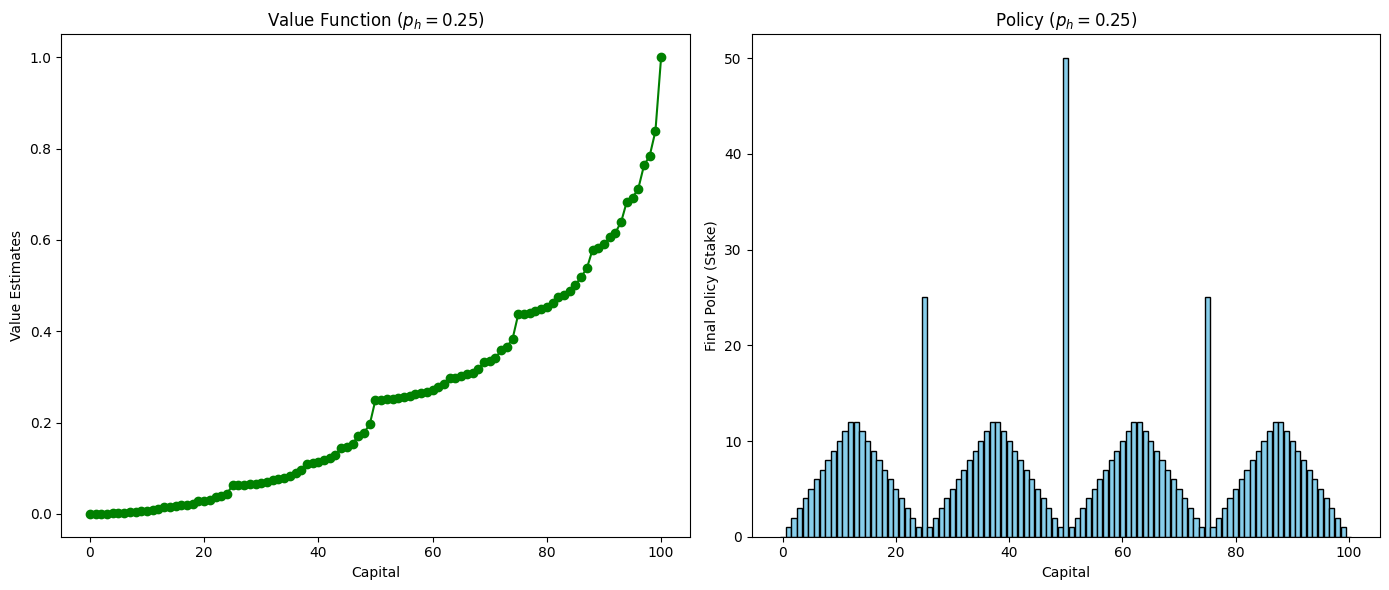

In [44]:
value,policy=value_iteration(0.25)
value[100]=1
print("Policy when probability = 0.25\n", policy)
plot_results(value,policy,0.25)

Policy when probability = 0.55
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


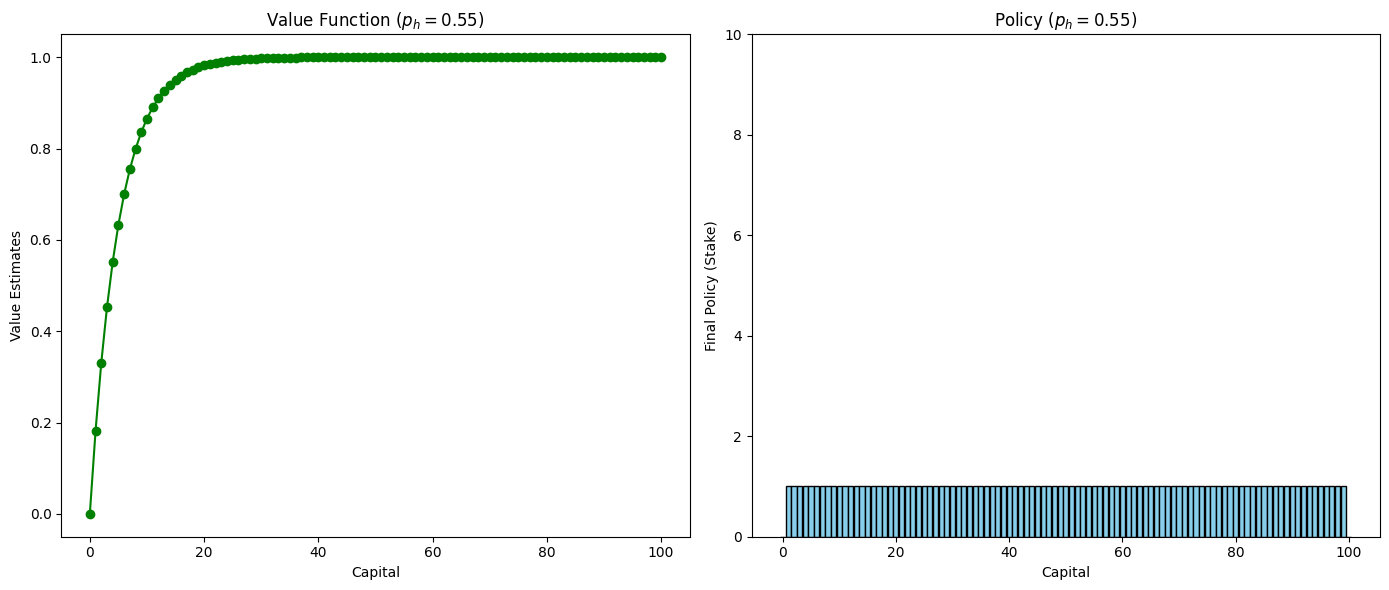

In [45]:
value,policy=value_iteration(0.55)
value[100]=1
print("Policy when probability = 0.55\n", policy)
plot_results(value,policy,0.55)